In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pickle

In [2]:
# a_file = open("./Results_detail/Neighbourhood_results_#0.pkl", "rb")
# results = pickle.load(a_file)
# a_file.close()

In [3]:
def add_column_names(data):
    data.columns = data.columns.astype(int)
    for i in data.columns:
        #data[i] = data[i].astype('|S500')
        data[i] = data[i].astype(float, errors = 'ignore')
    return data.rename(columns = {0:'Municipality', 1: 'Neighbourhood',2:'LT-suitability', 3:'MT-suitability',4:'HT-suitability',5:'Cityheating', 6:'Heat Pumps', 7:'Gas Connections',8:'Average spending',9: 'Year',10:'Best Primary source',11: 'Net-temp', 12:'HG contract', 13: 'HP contract', 14: 'Insulation contract', 15:'Dominant system' })#.sort_values(['Municipality', 'Neighbourhood','Year']).reset_index(drop = True)

In [4]:
HG_scen = add_column_names(pd.read_csv('HG_high_scenario.csv', index_col = 0))
HP_scen = add_column_names(pd.read_csv('HP_high_scenario.csv', index_col = 0))

In [5]:
# def combine_replications(results):
#     first = True    
#     for i in range(2): 
#         total = add_column_names(pd.DataFrame(results[1][i][0]))
#         indexers = total.iloc[:,[10,11]]
#         for j in range(1,4):
#             total = total.append(add_column_names(pd.DataFrame(results[1][i][j]))) 
#         means = total.groupby(by = total.index).mean()
#         categoricals = total[total.columns[total.dtypes == object]][['Best Primary Source','Net-temp','HG contract', 'HP contract', 'Insulation contract', 'Dominant system']].groupby(by = total.index).agg(lambda x: pd.Series.mode(x)[0])#.agg(lambda x:x.value_counts())
#         outcome = indexers.merge(means, left_index = True, right_index = True).merge(categoricals, left_index = True, right_index = True).to_numpy()
#         outcome = np.expand_dims(outcome, 0)
#         if first == True:
#             outcome_set = outcome
#             first = False
#         else:
#             outcome_set = np.append(outcome_set, outcome, axis = 0)
#     return outcome_set

In [6]:
# from datetime import datetime

In [7]:
# # start = datetime.now()
# test = combine_replications(results)
# print(datetime.now() -start)

In [8]:
HG_scen

,Municipality,Neighbourhood,LT-suitability,MT-suitability,HT-suitability,Cityheating,Heat Pumps,Gas Connections,Average spending,Year,Best Primary source,Net-temp,HG contract,HP contract,Insulation contract,Dominant system
0,Amsterdam,AMC,0.625833,1.000000,1.0,0.000000,0.012399,0.987601,20215.023371,2020.0,No available options,0,Integrated,Building Team,Building Team,Gas connections
1,Amsterdam,AMC,0.781872,1.000000,1.0,0.000000,0.045780,0.954220,26065.799403,2021.0,No available options,0,Integrated,Building Team,Building Team,Gas connections
2,Amsterdam,AMC,0.814939,1.000000,1.0,0.000000,0.075236,0.924764,27376.710912,2022.0,No available options,0,Integrated,Building Team,Integrated,Gas connections
3,Amsterdam,AMC,0.836235,1.000000,1.0,0.000000,0.099029,0.900971,28269.126088,2023.0,No available options,0,Integrated,Building Team,Integrated,Gas connections
4,Amsterdam,AMC,0.854598,1.000000,1.0,0.000000,0.119746,0.880254,28987.394010,2024.0,No available options,0,Integrated,Building Team,Integrated,Gas connections
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27014,Zwartewaterland,Zwartsluis Kern,0.620043,0.982923,1.0,0.478247,0.153826,0.367927,14924.014349,2056.0,No available options,LT,Integrated,Integrated,Integrated,Cityheating
27015,Zwartewaterland,Zwartsluis Kern,0.620065,0.982968,1.0,0.479517,0.154128,0.366355,14931.551898,2057.0,No available options,LT,Integrated,Integrated,Integrated,Cityheating
27016,Zwartewaterland,Zwartsluis Kern,0.620072,0.982985,1.0,0.479778,0.154397,0.365825,14934.183980,2058.0,No available options,LT,Integrated,Integrated,Integrated,Cityheating
27017,Zwartewaterland,Zwartsluis Kern,0.620078,0.982999,1.0,0.483296,0.154640,0.362064,14936.384928,2059.0,No available options,LT,Integrated,Integrated,Integrated,Cityheating


In [9]:
geodata_url = 'https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_buurt_2019_gegeneraliseerd&outputFormat=json'
buurten  = gpd.read_file(geodata_url)

In [10]:
gemeenten = pd.read_csv('Gemeenten alfabetisch 2019.csv')
buurten = buurten.merge(gemeenten[['GemeentecodeGM', 'Gemeentenaam']], left_on = 'gm_code', right_on = 'GemeentecodeGM')

In [11]:
HG_scen = add_column_names(pd.read_csv('HG_high_scenario.csv', index_col = 0))
HP_scen = add_column_names(pd.read_csv('HP_high_scenario.csv', index_col = 0))
CO2_high_scen = add_column_names(pd.read_csv('CO2_high_scenario.csv', index_col = 0))
CO2_low_scen = add_column_names(pd.read_csv('CO2_low_scenario.csv', index_col = 0))

In [12]:
HG_scen_std = add_column_names(pd.read_csv('HG_high_scenario_std.csv', index_col = 0))
HP_scen_std = add_column_names(pd.read_csv('HP_high_scenario_std.csv', index_col = 0))
CO2_high_scen_std = add_column_names(pd.read_csv('CO2_high_scenario_std.csv', index_col = 0))
CO2_low_scen_std = add_column_names(pd.read_csv('CO2_low_scenario_std.csv', index_col = 0))

In [13]:
total_means = add_column_names(pd.read_csv('total_results_means.csv', index_col = None))
total_std = add_column_names(pd.read_csv('total_results_std.csv', index_col = 0))
covs = total_std[total_std.columns[total_std.dtypes == object]].merge(total_std[total_std.columns[total_std.dtypes == float]]/total_means[total_std.columns[total_std.dtypes == float]],left_index = True, right_index = True)

In [14]:
covs['Year'] = total_means['Year']
total_std['Year'] = total_means['Year']

In [15]:
HG_scen_std['Year'] = HG_scen['Year']
HP_scen_std['Year'] = HP_scen['Year']
CO2_high_scen_std['Year'] = CO2_high_scen['Year']
CO2_low_scen_std['Year'] = CO2_low_scen['Year']

In [16]:
neighbourhood_data = total_means

In [17]:
#neighbourhood_data['Net-temp'] = neighbourhood_data['Net-temp'].where(neighbourhood_data['Net-temp'] != '0')

In [18]:
neighbourhood_data['HG2'] = neighbourhood_data['HG contract'].where(neighbourhood_data.Cityheating != 0).fillna(np.NaN).astype(object)

In [19]:
data = buurten.merge(neighbourhood_data, left_on = ['Gemeentenaam', 'statnaam'], right_on = ['Municipality','Neighbourhood'], how = 'inner')

In [20]:
from matplotlib import cm, colors, colorbar
from ast import literal_eval

def createColourbar(lwr, upr, axes, cmap):
    """Create a colourbar with limits of lwr and upr"""
    cax, kw = colorbar.make_axes(axes)
    norm = colors.Normalize(vmin = lwr, vmax = upr, clip = False)

    c = colorbar.ColorbarBase(cax, cmap=cmap, norm=norm)
    return c

def show_choropleth_maps(map_data, cities, years, present_variable, orientation = None, cmap = 'viridis', legend = False, fig_h = 12, fig_w = 12, vmax = None, missing_kwds = None):
    """Create choropleth for dataset with Municipality and Year"""
    
    if missing_kwds != None:
        missing_kwds = missing_kwds = dict(color = "lightgrey") 
    
    cat_dict = {}
    for i in map_data.columns[map_data.dtypes != float][10:]:
        cat_dict[i] = dict(zip(map_data[i].dropna().unique(),
                   [x for x in range(map_data[i].dropna().nunique())]))
        
    if map_data[present_variable].dtype != float:
        categorical = True
        map_data[present_variable] = map_data[present_variable].map(cat_dict[present_variable]).astype(object)
    
    if vmax == None:
        vmax = round(map_data.set_index(['Municipality','Year']).loc[(cities,years),[present_variable]].max(),1) 
    vmin = 0
    
    figsize = (fig_h, fig_w)
    
    fig, axes = plt.subplots(len(cities),len(years), figsize = figsize)

    for i in range (len(cities)):
        for j in range (len(years)):
            city = map_data.Municipality == cities[i]
            year = map_data.Year == years[j]      
            dataset= map_data.loc[city].loc[year]
            if len(cities) > 1 and len(years) > 1:
                mp = dataset.plot(column =present_variable, cmap=cmap, ax = axes[i][j], vmin=vmin, vmax=vmax, legend=legend, missing_kwds=missing_kwds)
            else:
                if len(cities) > 1 or len (years) > 1: 
                    mp = dataset.plot(column =present_variable, cmap=cmap, ax = axes[max(i,j)], vmin=vmin, vmax=vmax,legend=legend, missing_kwds=missing_kwds)
                else:
                    mp = dataset.plot(column =present_variable, cmap=cmap, ax = axes, vmin=vmin, vmax=vmax,legend=legend, missing_kwds=missing_kwds)
            mp.axis('off')
            mp.set_title(f'{cities[i]}, {years[j]}')

    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0.05)        

    if map_data[present_variable].dtype == float:
        createColourbar(0,vmax, axes, cmap)
    else:
        colors = cm.viridis(np.linspace(0, 1, len(cat_dict[present_variable])))
        f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
        handles = [f("s", colors[i]) for i in range(len(colors))]
        labels = cat_dict[present_variable]
        legend = fig.legend(handles, labels, loc = 8, framealpha=1, frameon=True , prop={'size': 16})#, bbox_to_anchor=[0.9, 0.8])

    for i in range (len(cities)):
        for j in range (len(years)):
            if len(cities) > 1 and len(years) > 1:
                axes[i][j].set_anchor('C')
            else:
                if len(cities) > 1 or len (years) > 1:
                    axes[max(i,j)].set_anchor('C')
                else:
                    axes.set_anchor('C')

In [21]:
from matplotlib import colors as col
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

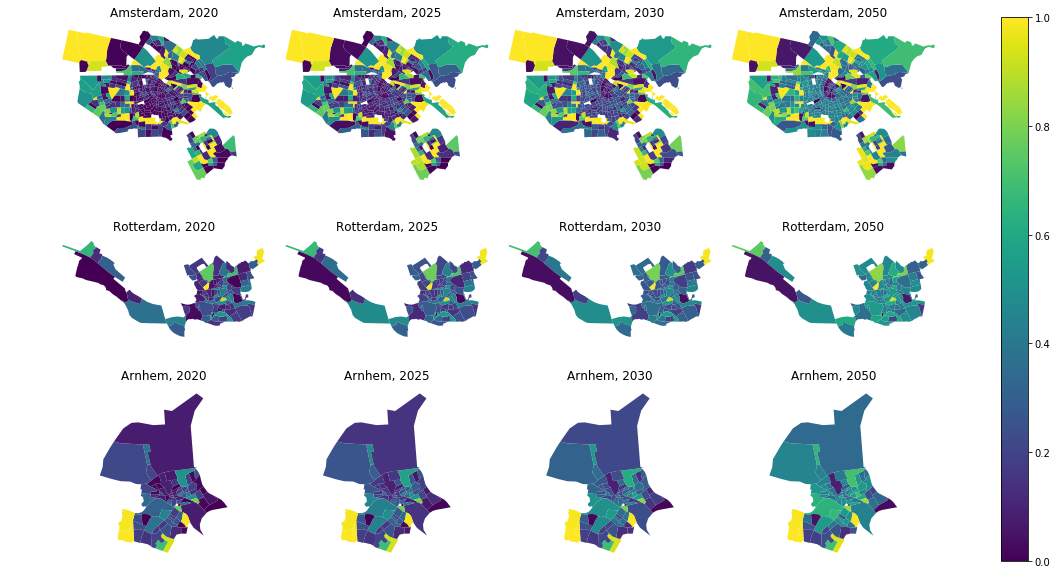

In [22]:
data = buurten.merge(neighbourhood_data, left_on = ['Gemeentenaam', 'statnaam'], right_on = ['Municipality','Neighbourhood'], how = 'inner')
cities = ['Amsterdam', 'Rotterdam', 'Arnhem']#,'Zwartewaterland']
years = [2020, 2025, 2030, 2050]
present_variable = 'LT-suitability'
show_choropleth_maps(data, cities, years, present_variable, cmap = 'viridis', vmax = None, fig_h = 20, fig_w = 10, missing_kwds = None )

In [23]:
LT_improvement = data.where(data.Year == 2060).dropna(how= 'all').reset_index(drop = True)['LT-suitability'] - data.where(data.Year == 2020).dropna(how = 'all').reset_index(drop = True)['LT-suitability']

In [24]:
LT_improvement_data = data.where(data.Year == 2060).dropna(how = 'all').iloc[:,:12].reset_index(drop = True).merge(LT_improvement, left_index = True, right_index = True)

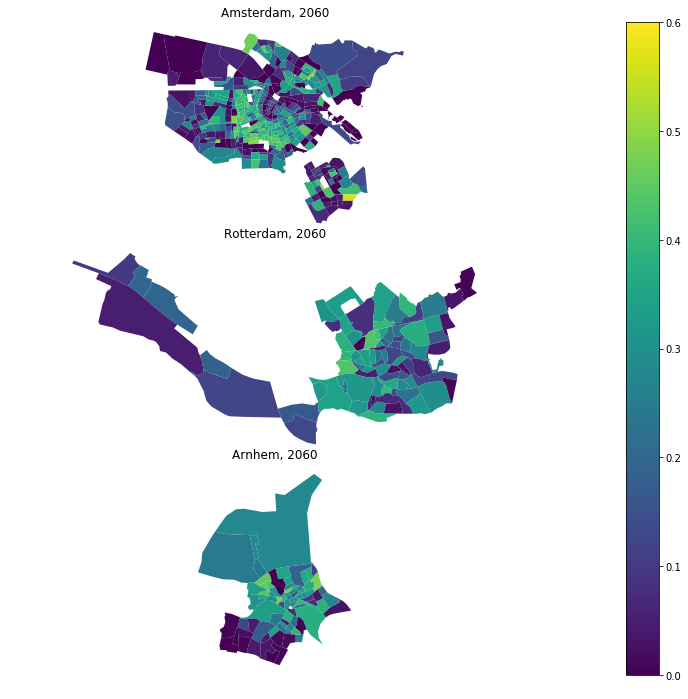

In [25]:
cities = ['Amsterdam', 'Rotterdam', 'Arnhem']#,'Zwartewaterland']
years = [2060]
present_variable = 'LT-suitability'
show_choropleth_maps(LT_improvement_data, cities, years, present_variable, cmap = 'viridis', vmax = None, fig_h = 14, fig_w = 12, missing_kwds = None )

C:\Users\Dirk\Anaconda3\lib\site-packages\geopandas\plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
C:\Users\Dirk\Anaconda3\lib\site-packages\geopandas\plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
C:\Users\Dirk\Anaconda3\lib\site-packages\geopandas\plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


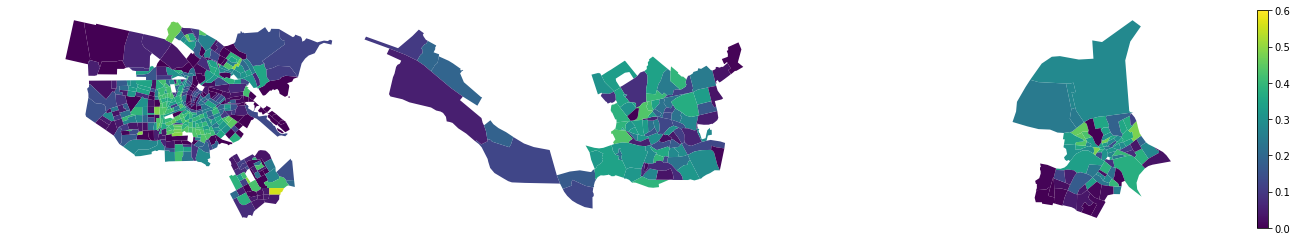

In [26]:
fig, axes = plt.subplots(1,3, figsize = (28,4))
cities = ['Amsterdam', 'Rotterdam', 'Arnhem']
test = LT_improvement_data
for i in range (3):
    mp = test[test.Municipality == cities[i]].plot(column ='LT-suitability', vmin = 0, vmax = 0.6, cmap='viridis', ax = axes[i], missing_kwds = dict(color = "lightgrey") )
    mp.axis('off')
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)
createColourbar(0,0.6, axes, 'viridis')

In [27]:
total_means[(total_means.Year == 2050) & (total_means['Net-temp'] !='HT') & (total_means['Municipality'] == 'Arnhem')].sort_values('Cityheating',ascending = False).head(10)

,Municipality,Neighbourhood,Year,LT-suitability,MT-suitability,HT-suitability,Cityheating,Heat Pumps,Gas Connections,Average spending,Best Primary source,Net-temp,HG contract,HP contract,Insulation contract,Dominant system,HG2
20899,Arnhem,Presikhaaf I,2050.0,0.594746,0.988811,1.0,0.785250,0.052938,0.161813,9049.469747,No available options,LT,Integrated,Integrated,Integrated,Cityheating,Integrated
21842,Arnhem,Velperweg-Noord,2050.0,0.572423,0.924382,1.0,0.733082,0.044592,0.222326,13490.740110,No available options,LT,Integrated,Building Team,Integrated,Cityheating,Integrated
19013,Arnhem,Boulevardwijk,2050.0,0.506712,0.819924,1.0,0.711718,0.050751,0.237531,14611.110749,No available options,LT,Integrated,Building Team,Integrated,Cityheating,Integrated
21678,Arnhem,Terrein ENKA,2050.0,0.694619,1.000000,1.0,0.662957,0.142739,0.194303,11173.409724,No available options,LT,Building Team,Building Team,Building Team,Cityheating,Building Team
21965,Arnhem,Weverstraat,2050.0,0.458501,0.919644,1.0,0.658140,0.053841,0.288018,11358.830158,No available options,LT,Integrated,Integrated,Integrated,Cityheating,Integrated
20243,Arnhem,Klarendal-Zuid,2050.0,0.518171,0.887282,1.0,0.635505,0.081326,0.283169,10365.564310,No available options,LT,Integrated,Integrated,Integrated,Cityheating,Integrated
20161,Arnhem,Klarenbeek,2050.0,0.699628,0.948272,1.0,0.600024,0.077902,0.322073,21529.571293,No available options,LT,Integrated,Building Team,Integrated,Cityheating,Integrated
20079,Arnhem,Janssingel,2050.0,0.562133,0.944735,1.0,0.565161,0.127494,0.307344,13052.109392,No available options,0,Building Team,Building Team,Integrated,Cityheating,Building Team
19751,Arnhem,Het Dorp/Mariëndaal,2050.0,0.523679,0.989565,1.0,0.522883,0.160847,0.316270,16234.350310,No available options,0,Building Team,Building Team,Integrated,Cityheating,Building Team
19054,Arnhem,Brouwerijweg e.o.,2050.0,0.516738,0.886361,1.0,0.518122,0.076377,0.405501,14616.929445,No available options,0,Integrated,Building Team,Integrated,Cityheating,Integrated


In [28]:
total_means['HG year'] = total_means['Year'].where(total_means['Cityheating']> 0.5)

In [29]:
hg_year_table = total_means[['Municipality', 'Neighbourhood', 'HG year','HG contract']].groupby(by = ['Municipality', 'Neighbourhood']).min().reset_index()

In [30]:
hg_year_table.sort_values(['HG year']).dropna()['HG contract'].value_counts()

Integrated       183
Building Team     75
Life-cycle         5
Name: HG contract, dtype: int64

In [31]:
hg_years = hg_year_table.merge(total_means[['Municipality', 'Neighbourhood', 'Cityheating','Net-temp','HG contract']].groupby(by = ['Municipality', 'Neighbourhood']).max().reset_index(), how = 'inner')

In [32]:
hg_years = hg_years[hg_years['Net-temp']!= 'HT']

In [33]:
hg_sorted = hg_years.dropna().sort_values(['Municipality', 'HG year'])

In [34]:
hg_sorted = hg_sorted.set_index('Municipality')

In [35]:
hg_sorted

,Neighbourhood,HG year,HG contract,Cityheating,Net-temp
Municipality,,,,,
Amsterdam,Bijlmermuseum Noord,2020.0,Integrated,0.979955,MT
Amsterdam,K-buurt Midden,2020.0,Integrated,0.981029,MT
Amsterdam,Robert Scottbuurt West,2020.0,Integrated,0.890160,MT
Amsterdam,Staalmanbuurt,2020.0,Integrated,0.948605,MT
Amsterdam,Banne Zuidwest,2021.0,Integrated,0.952636,MT
...,...,...,...,...,...
Rotterdam,Feijenoord,2023.0,Integrated,0.865035,MT
Rotterdam,Nieuw Crooswijk,2023.0,Integrated,0.842713,MT
Rotterdam,Noordereiland,2023.0,Integrated,0.937351,MT


In [36]:
hg_sorted.loc['Rotterdam'].groupby(by = 'HG year').count()

,Neighbourhood,HG contract,Cityheating,Net-temp
HG year,,,,
2020.0,3,3,3,3
2021.0,1,1,1,1
2022.0,2,2,2,2
2023.0,8,8,8,8


In [37]:
hg_sorted['HG year'] = hg_sorted['HG year'].astype(int)
hg_sorted['Cityheating'] = hg_sorted['Cityheating'].round(2)

In [38]:
hg_sorted

,Neighbourhood,HG year,HG contract,Cityheating,Net-temp
Municipality,,,,,
Amsterdam,Bijlmermuseum Noord,2020,Integrated,0.98,MT
Amsterdam,K-buurt Midden,2020,Integrated,0.98,MT
Amsterdam,Robert Scottbuurt West,2020,Integrated,0.89,MT
Amsterdam,Staalmanbuurt,2020,Integrated,0.95,MT
Amsterdam,Banne Zuidwest,2021,Integrated,0.95,MT
...,...,...,...,...,...
Rotterdam,Feijenoord,2023,Integrated,0.87,MT
Rotterdam,Nieuw Crooswijk,2023,Integrated,0.84,MT
Rotterdam,Noordereiland,2023,Integrated,0.94,MT


In [39]:
hg_sorted.to_csv('hg_sorted.csv')

In [40]:
test = buurten.merge(hg_years.sort_values(['Cityheating'], ascending = False),left_on = ['Gemeentenaam', 'statnaam'], right_on = ['Municipality','Neighbourhood'], how = 'inner')

In [41]:
test

,id,statcode,jrstatcode,statnaam,gm_code,rubriek,geometry,GemeentecodeGM,Gemeentenaam,Municipality,Neighbourhood,HG year,HG contract,Cityheating,Net-temp
0,cbs_buurt_2019_gegeneraliseerd.2093,BU02020732,2019BU02020732,Klarendal-Zuid,GM0202,buurt,"MULTIPOLYGON (((191924.274 444754.786, 192000....",GM0202,Arnhem,Arnhem,Klarendal-Zuid,2037.0,Integrated,0.694168,LT
1,cbs_buurt_2019_gegeneraliseerd.2068,BU02020100,2019BU02020100,Markt,GM0202,buurt,"MULTIPOLYGON (((191025.271 444067.303, 191035....",GM0202,Arnhem,Arnhem,Markt,2034.0,Integrated,0.699480,LT
2,cbs_buurt_2019_gegeneraliseerd.2069,BU02020101,2019BU02020101,Weverstraat,GM0202,buurt,"MULTIPOLYGON (((190419.846 443792.483, 190773....",GM0202,Arnhem,Arnhem,Weverstraat,2036.0,Integrated,0.725194,LT
3,cbs_buurt_2019_gegeneraliseerd.2070,BU02020102,2019BU02020102,Rijnstraat,GM0202,buurt,"MULTIPOLYGON (((190654.108 444036.262, 191025....",GM0202,Arnhem,Arnhem,Rijnstraat,NaN,Integrated,0.056547,0
4,cbs_buurt_2019_gegeneraliseerd.2072,BU02020104,2019BU02020104,Stationsplein,GM0202,buurt,"MULTIPOLYGON (((190017.419 444238.167, 190580....",GM0202,Arnhem,Arnhem,Stationsplein,NaN,Integrated,0.081403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,cbs_buurt_2019_gegeneraliseerd.11775,BU18960407,2019BU18960407,Zwartsluis Industrieterrein,GM1896,buurt,"MULTIPOLYGON (((202493.990 518222.042, 202753....",GM1896,Zwartewaterland,Zwartewaterland,Zwartsluis Industrieterrein,NaN,Integrated,0.000000,0
491,cbs_buurt_2019_gegeneraliseerd.11776,BU18960408,2019BU18960408,De Velde-Zwartewatersklooster,GM1896,buurt,"MULTIPOLYGON (((203152.123 515574.161, 203530....",GM1896,Zwartewaterland,Zwartewaterland,De Velde-Zwartewatersklooster,NaN,Integrated,0.000000,0
492,cbs_buurt_2019_gegeneraliseerd.11777,BU18960409,2019BU18960409,Landelijk gebied Zwartsluis,GM1896,buurt,"MULTIPOLYGON (((204591.939 519987.922, 203774....",GM1896,Zwartewaterland,Zwartewaterland,Landelijk gebied Zwartsluis,NaN,Integrated,0.000000,0
493,cbs_buurt_2019_gegeneraliseerd.11778,BU18960410,2019BU18960410,Barsbeek,GM1896,buurt,"MULTIPOLYGON (((200638.541 517707.684, 200696....",GM1896,Zwartewaterland,Zwartewaterland,Barsbeek,NaN,Integrated,0.000128,0


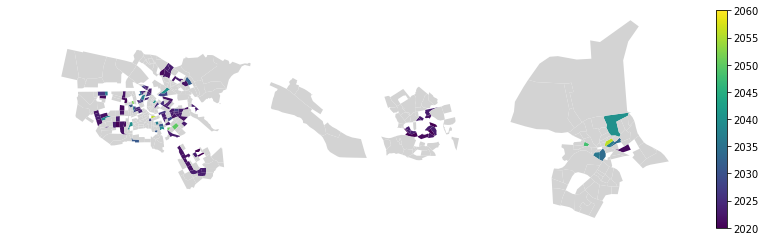

In [42]:
fig, axes = plt.subplots(1,3, figsize = (14,4))
cities = ['Amsterdam', 'Rotterdam', 'Arnhem']
for i in range (3):
    mp = test[test.Municipality == cities[i]].plot(column ='HG year', vmin = 2020, vmax = 2060, cmap='viridis', ax = axes[i], missing_kwds = dict(color = "lightgrey") )
    mp.axis('off')
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)
createColourbar(2020,2060, axes, 'viridis')


In [43]:
hg_year_table.dropna()['HG contract'].value_counts()

Integrated       183
Building Team     75
Life-cycle         5
Name: HG contract, dtype: int64

In [44]:
import seaborn as sns

C:\Users\Dirk\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


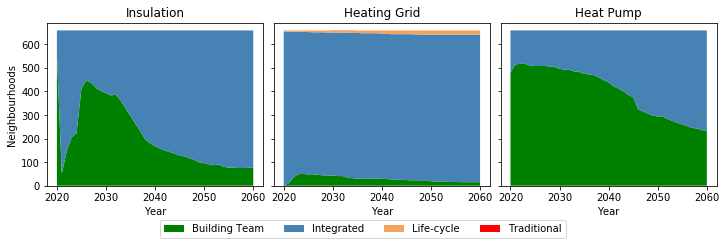

In [45]:
info = 'Insulation contract'


fig, axes = plt.subplots(1,3, figsize = (12,3),sharey=True,)
# Data
contracts = ['Insulation contract', 'HG contract', 'HP contract']
names = ['Insulation', 'Heating Grid', 'Heat Pump']
j = 0
for i in contracts:
    contract = data.groupby(by = ['Year',i]).count()[['id']]
    contract = contract.unstack().fillna(0)['id']

    x=list(contract.index)#['SD_Cumulative CO2 emissions']
    y=contract.transpose()
    #pal = sns.color_palette("viridis_r", 4)
    pal = ['green', 'steelblue', 'sandybrown', 'red', 'skyblue', 'steelblue'] 
    
# Plot
    axes[j].stackplot(x,y, labels=contract.columns, colors=pal, alpha=1 )
    axes[j].set_title(names[j])
    axes[j].set_xlabel('Year')
    j+=1

axes[0].set_ylabel('Neighbourhoods')   
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=None) 

h, l = axes[1].get_legend_handles_labels()
axes[0].legend(h,l, loc = 'lower left', ncol = 4, bbox_to_anchor= (+0.5,-0.35))
plt.show()

In [46]:
# Moving Choropleth Maps

In [47]:
data.columns

Index(['id', 'statcode', 'jrstatcode', 'statnaam', 'gm_code', 'rubriek',
       'geometry', 'GemeentecodeGM', 'Gemeentenaam', 'Municipality',
       'Neighbourhood', 'Year', 'LT-suitability', 'MT-suitability',
       'HT-suitability', 'Cityheating', 'Heat Pumps', 'Gas Connections',
       'Average spending', 'Best Primary source', 'Net-temp', 'HG contract',
       'HP contract', 'Insulation contract', 'Dominant system', 'HG2'],
      dtype='object')

C:\Users\Dirk\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\Dirk\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\Dirk\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too 

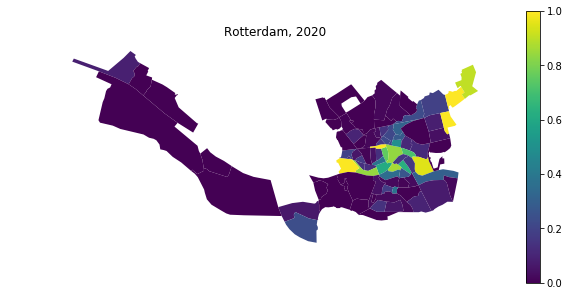

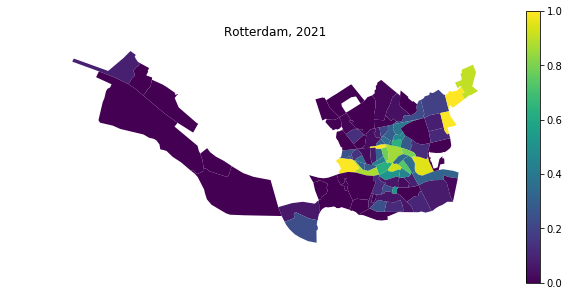

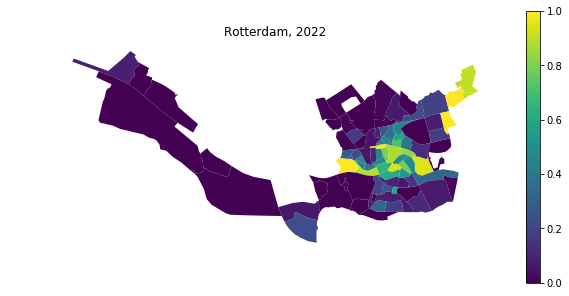

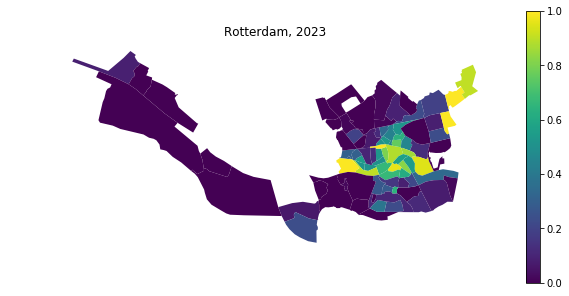

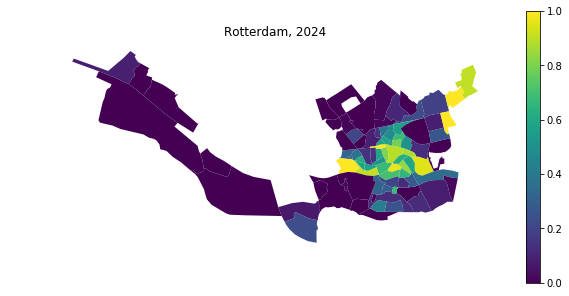

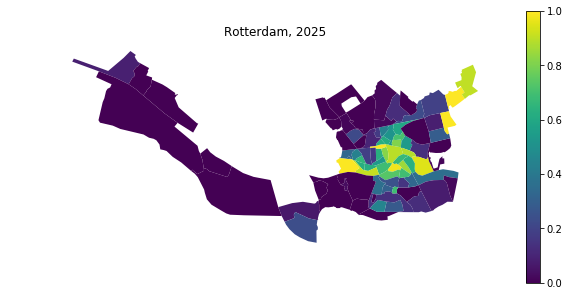

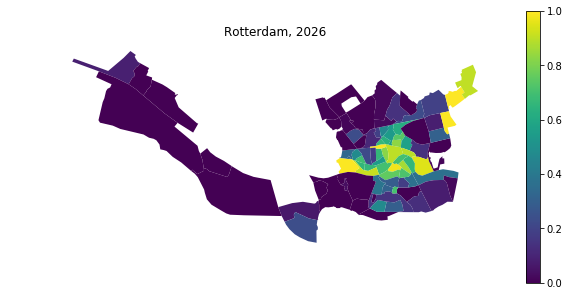

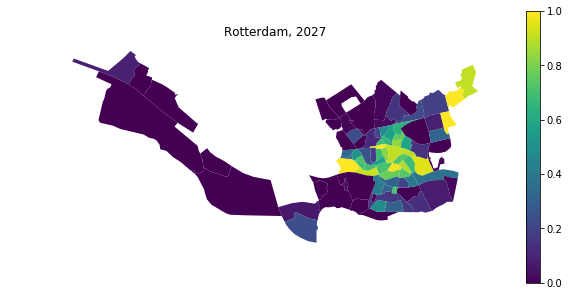

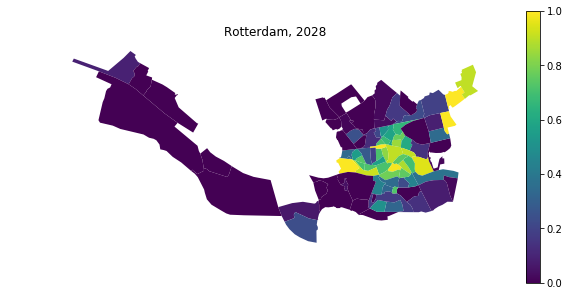

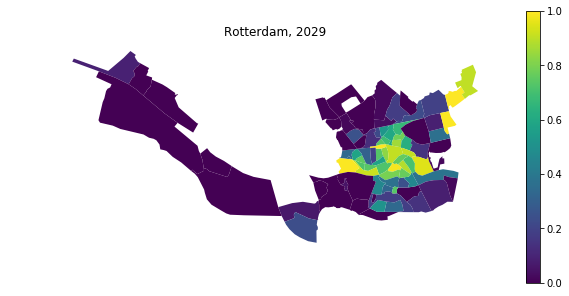

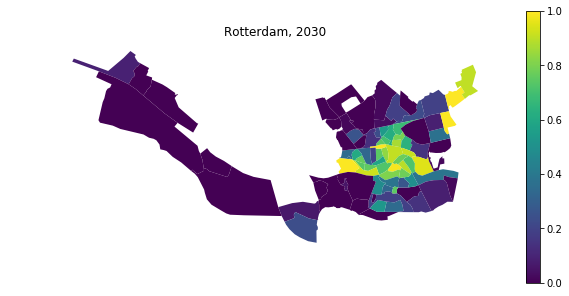

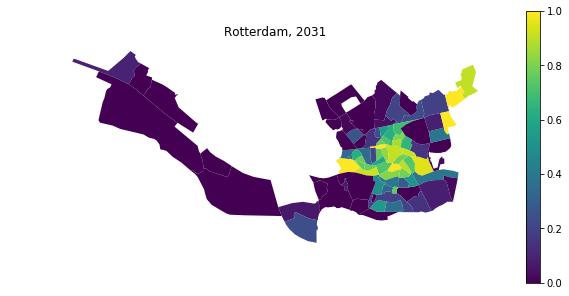

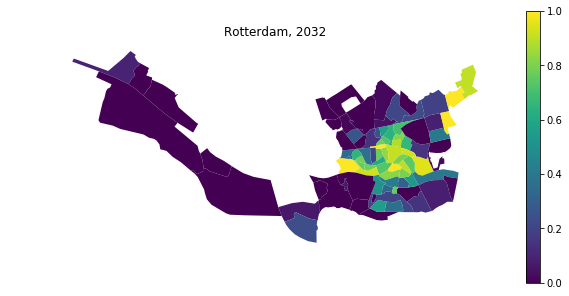

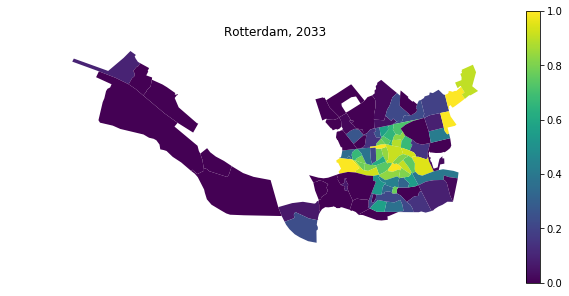

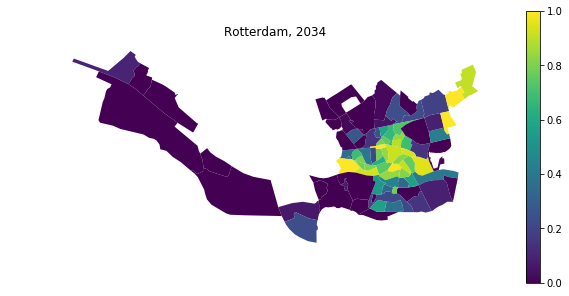

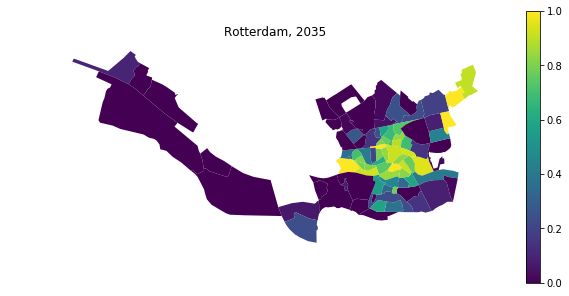

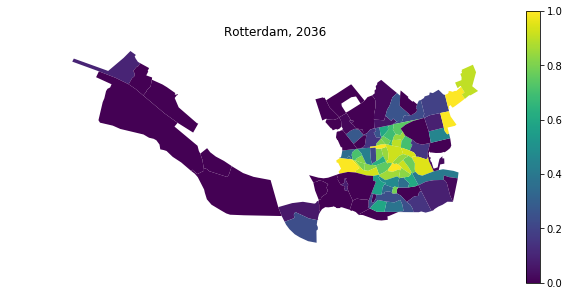

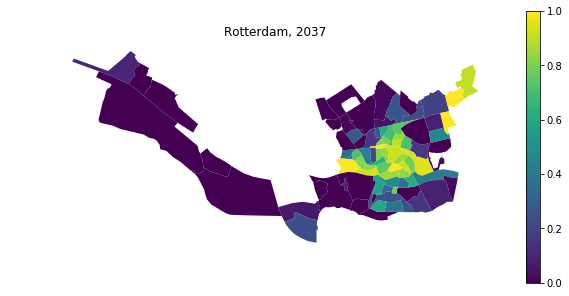

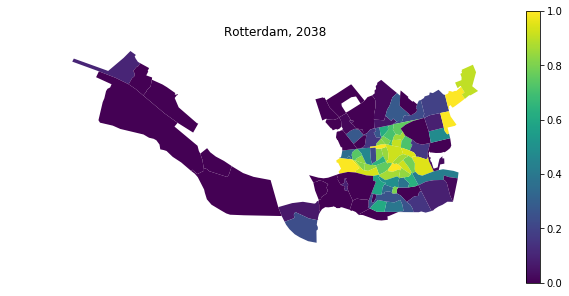

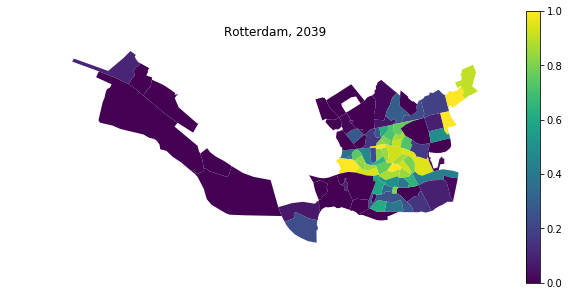

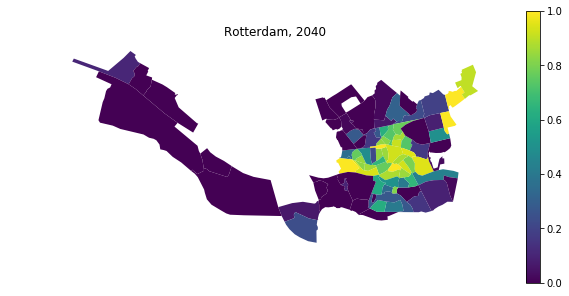

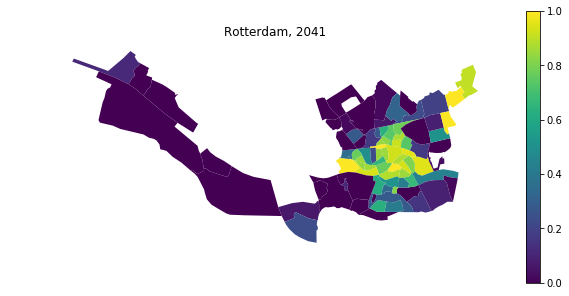

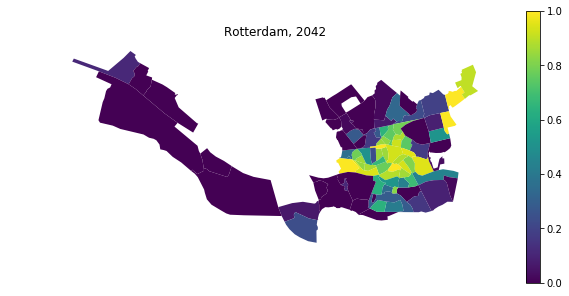

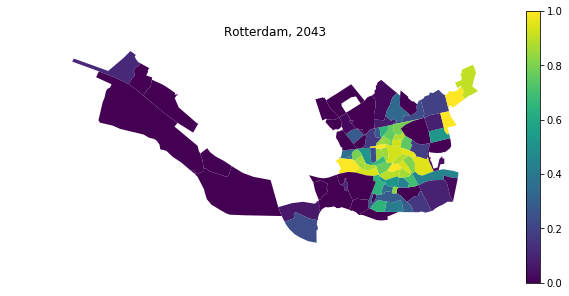

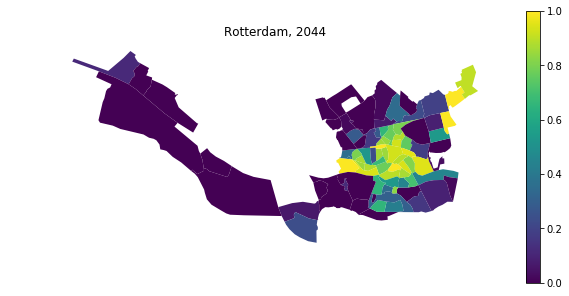

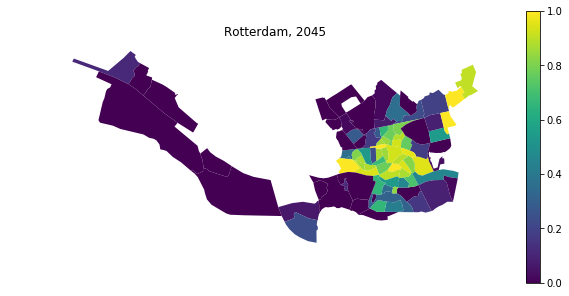

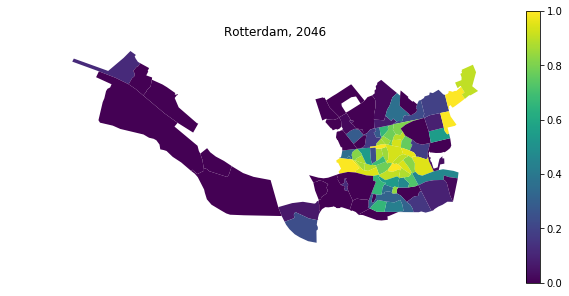

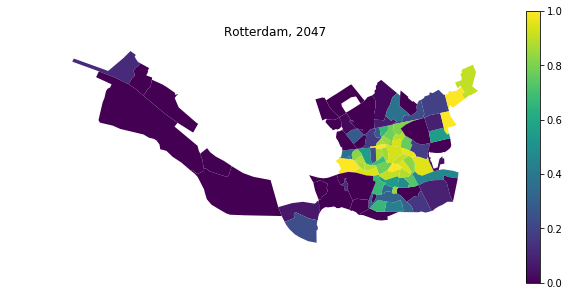

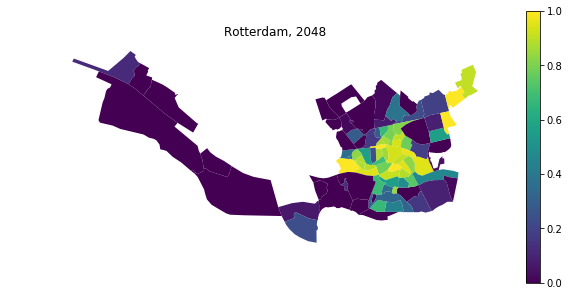

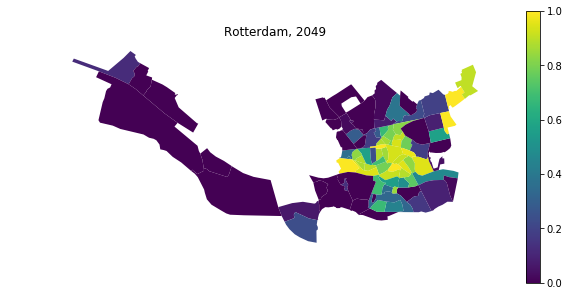

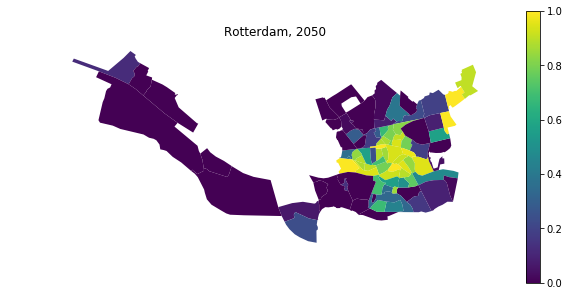

In [48]:
filenames = []
City = 'Rotterdam'
for i in range (2020,2051):   
    data = buurten.merge(neighbourhood_data, left_on = ['Gemeentenaam', 'statnaam'], right_on = ['Municipality','Neighbourhood'], how = 'inner')
    cities = [City]#, 'Rotterdam', 'Arnhem']#,'Zwartewaterland']
    years = [i]
    present_variable = 'Cityheating'
    show_choropleth_maps(data, cities, years, present_variable, cmap = 'viridis', vmax = None, fig_h = 10, fig_w = 5, missing_kwds = None )
    plt.savefig('Choropleth timeseries/'+City+'_' + str(i)+ '.jpeg')
    filenames.append('Choropleth timeseries/'+City+'_' + str(i)+ '.jpeg')

In [49]:
import imageio
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('C:/Users/Dirk/EnergyTransition_MultiModel-master/EnergyTransition_MultiModel-master/Multi-model Final Git/Results/Choropleth timeseries/'+ City + '.mp4', images)#, duration=0.25)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (720, 360) to (720, 368) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [82]:
cityh = data.set_index(['Municipality', 'Neighbourhood'])

In [87]:
cityh = cityh.where(cityh.Year == 2050).dropna(how = 'all')['Cityheating']

In [54]:
filepath_processed = 'C:/Users/Dirk/Google Drive/Dirk/TU/Afstuderen/Afstuderen/Thesis/3. Formalisation/Processed CBS data/'
kwb_n = pd.read_csv(filepath_processed + 'total_kwb.csv').set_index(['gemeente', 'buurt_naam'])

In [88]:
cityh = kwb_n.merge(cityh, left_index = True, right_on = ['Municipality', 'Neighbourhood'], how = 'inner')

In [101]:
cityh = cityh.reset_index()

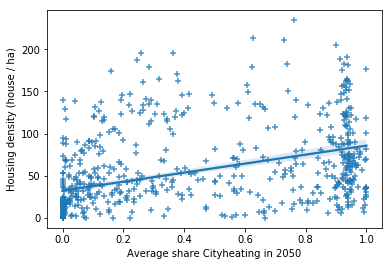

In [105]:
x = cityh['Cityheating']
y = cityh['total']/ cityh['a_lan_ha']
fig = sns.regplot(x=x, y=y, order = 1, marker = '+')
fig.set_xlabel('Average share Cityheating in 2050')
fig.set_ylabel('Housing density (house / ha)')

plt.show()

In [81]:
cityh.columns

Index(['total', 'g_woz', 'p_koopw', 'p_wcorpw', 'p_ov_hw', 'a_opp_ha',
       'a_lan_ha', 'a_wat_ha', 'p_hh_li', 'p_hh_hi', 'p_stadsv',
       'Centroid in WKO-contour?', 'Potentie WKO per buurt (GJ)',
       'Potentie bodemlussen per buurt (GJ)', 'P-WKO', 'P-GHP', 'P-TESW',
       'g_ink_pi', 'Aansluitingen', 'Aansluit_lengte_m',
       'Hoofdleiding_lengte_m', 'x', 'y', 'Cityheating'],
      dtype='object')

In [98]:
help(sns.boxplot)

Help on function boxplot in module seaborn.categorical:

boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
    Draw a box plot to show distributions with respect to categories.
    
    A box plot (or box-and-whisker plot) shows the distribution of quantitative
    data in a way that facilitates comparisons between variables or across
    levels of a categorical variable. The box shows the quartiles of the
    dataset while the whiskers extend to show the rest of the distribution,
    except for points that are determined to be "outliers" using a method
    that is a function of the inter-quartile range.
    
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` paramet